<a href="https://colab.research.google.com/github/NGONGOCHA/HK2-nam1/blob/main/%C4%90%E1%BB%93_%C3%A1n_PH%C3%82N_T%C3%8DCH_D%E1%BB%AE_LI%E1%BB%86U_B%E1%BA%B0NG_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1) Sử dụng tập tin Inc_Exp_Data.csv để thực hiện phân tích thống kê mô tả về tập dữ liệu này**

In [ ]:
import pandas as pd
import numpy as np
import statistics as sta
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

Đọc dữ liệu từ file csv

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Classroom/Phân tích dữ liệu với Python - K2 Phần cơ sở/ĐỒ ÁN/Inc_Exp_Data.csv")
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


hiển thị kích thước của tập dữ liệu


In [ ]:
df.shape

(50, 7)

Hiển thị thông tin của từng cột dữ liệu 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


Giải thích ý nghĩa các cột dữ liệu 

- Mthly_HH_Income : Thu nhập hàng tháng
- Mthly_HH_Expense : Chi tiêu hàng tháng
- No_of_Fly_Members : Số thành viên trong gia đình
- Emi_or_Rent_Amt : Chi phí phát sinh hàng tháng
- Annual_HH_Income : Thu nhập hàng năm
- Highest_Qualified_Member : Trình độ học vấn của các thành viên trong gia đình
- No_of_Earning_Members : Thành viên không kiếm ra tiền 

**TÍNH CÁC CHỈ SỐ THỐNG KÊ VỚI CÁC CỘT DỮ LIỆU ĐỊNH LƯỢNG**

Các cột dữ liệu định lượng là:
- Mthly_HH_Income : Thu nhập hàng tháng
- Mthly_HH_Expense : Chi tiêu hàng tháng
- Emi_or_Rent_Amt : Chi phí phát sinh hàng tháng
- Annual_HH_Income : Thu nhập hàng năm

In [ ]:
df2 = pd.DataFrame(columns = ['Mthly_HH_Income', 'Mthly_HH_Expense',  'Emi_or_Rent_Amt','Annual_HH_Income'], data = df)
df2.describe()

,Mthly_HH_Income,Mthly_HH_Expense,Emi_or_Rent_Amt,Annual_HH_Income
count,50.000000,50.000000,50.000000,5.000000e+01
mean,41558.000000,18818.000000,3060.000000,4.900190e+05
std,26097.908979,12090.216824,6241.434948,3.201358e+05
min,5000.000000,2000.000000,0.000000,6.420000e+04
25%,23550.000000,10000.000000,0.000000,2.587500e+05
50%,35000.000000,15500.000000,0.000000,4.474200e+05
75%,50375.000000,25000.000000,3500.000000,5.947200e+05
max,100000.000000,50000.000000,35000.000000,1.404000e+06


Giá trị trung vị - median;

In [ ]:
df2[['Mthly_HH_Income', 'Mthly_HH_Expense',  'Emi_or_Rent_Amt','Annual_HH_Income']].median().astype(int)

Mthly_HH_Income      35000
Mthly_HH_Expense     15500
Emi_or_Rent_Amt          0
Annual_HH_Income    447420
dtype: int64

Phương sai - variance;

In [ ]:
print(df2.var())

Mthly_HH_Income     6.811009e+08
Mthly_HH_Expense    1.461733e+08
Emi_or_Rent_Amt     3.895551e+07
Annual_HH_Income    1.024869e+11
dtype: float64


Giá trị Yếu vị - Mode

In [ ]:
print(df2.mode())

   Mthly_HH_Income  Mthly_HH_Expense  Emi_or_Rent_Amt  Annual_HH_Income
0            45000             25000                0            590400


Độ trải giữa - IQR

In [ ]:
print("Độ trải giữa IQR là: ")
df2.quantile(0.75) - df2.quantile(0.25)

Độ trải giữa IQR là: 


Mthly_HH_Income      26825.0
Mthly_HH_Expense     15000.0
Emi_or_Rent_Amt       3500.0
Annual_HH_Income    335970.0
dtype: float64

ĐỘ TƯƠNG QUAN (CORRELATION) GIỮA CÁC CỘT ĐỊNH LƯỢNG

In [ ]:
correlation = df2.corr(method="pearson")
correlation

,Mthly_HH_Income,Mthly_HH_Expense,Emi_or_Rent_Amt,Annual_HH_Income
Mthly_HH_Income,1.000000,0.649215,0.036976,0.970315
Mthly_HH_Expense,0.649215,1.000000,0.405280,0.591222
Emi_or_Rent_Amt,0.036976,0.405280,1.000000,0.002716
Annual_HH_Income,0.970315,0.591222,0.002716,1.000000


BIỂU ĐỒ BOXPLOT CHO TỪNG CỘT DỮ LIỆU ĐỊNH LƯỢNG

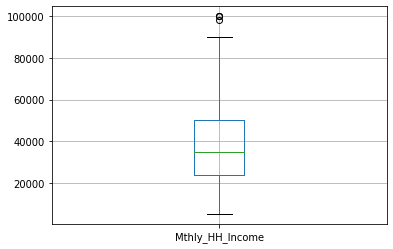

In [ ]:
df2.boxplot(['Mthly_HH_Income'])

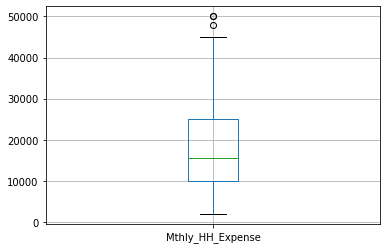

In [ ]:
df2.boxplot(['Mthly_HH_Expense'])

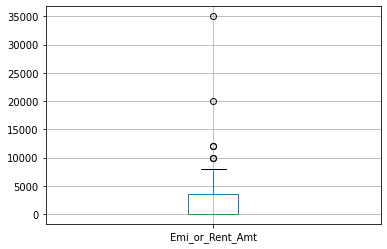

In [ ]:
df2.boxplot(['Emi_or_Rent_Amt'])

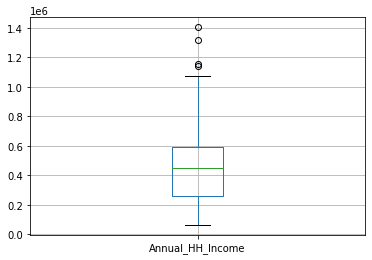

In [ ]:
df2.boxplot(['Annual_HH_Income'])

BIỂU ĐỒ NHIỆT (HEATMAP)

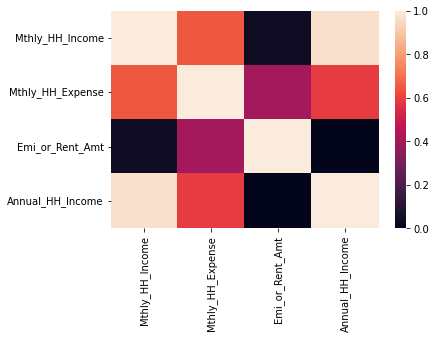

In [ ]:
heat_map = sns.heatmap(correlation,vmin = 0,vmax=1)

BIỂU ĐỒ CẶP (PAIR PLOT)

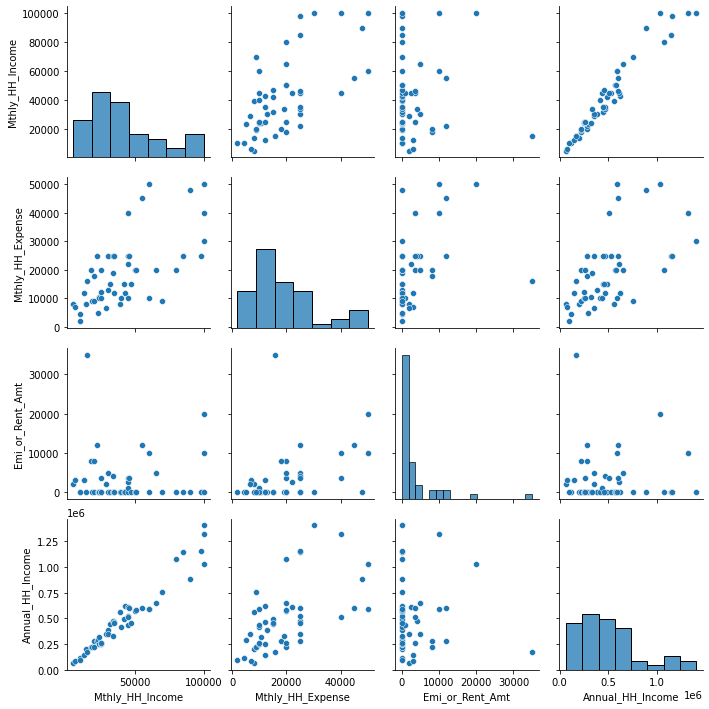

In [ ]:
sns.pairplot(df2)

BIỂU ĐỒ DẠNG CỘT ĐỨNG

(array([6., 7., 9., 7., 9., 3., 2., 1., 2., 4.]),
 array([  5000.,  14500.,  24000.,  33500.,  43000.,  52500.,  62000.,
         71500.,  81000.,  90500., 100000.]),
 <a list of 10 Patch objects>)

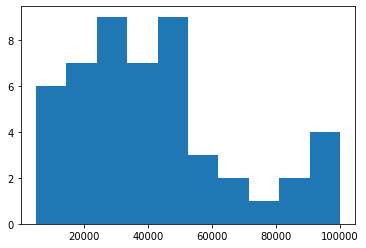

In [ ]:
fig, ax = plt.subplots()
ax.hist(df2['Mthly_HH_Income'])

(array([ 4., 13.,  9.,  8.,  9.,  1.,  0.,  2.,  1.,  3.]),
 array([ 2000.,  6800., 11600., 16400., 21200., 26000., 30800., 35600.,
        40400., 45200., 50000.]),
 <a list of 10 Patch objects>)

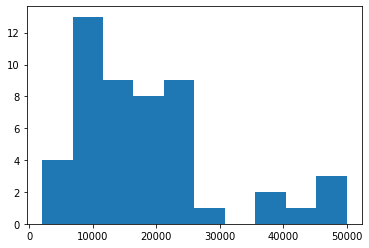

In [ ]:
fig, ax = plt.subplots()
ax.hist(df2['Mthly_HH_Expense'])

(array([36.,  6.,  4.,  2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([    0.,  3500.,  7000., 10500., 14000., 17500., 21000., 24500.,
        28000., 31500., 35000.]),
 <a list of 10 Patch objects>)

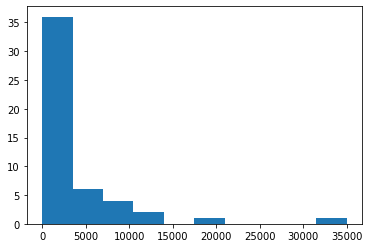

In [ ]:
fig, ax = plt.subplots()
ax.hist(df2['Emi_or_Rent_Amt'])

(array([ 7., 12.,  8., 11.,  4.,  1.,  1.,  2.,  2.,  2.]),
 array([  64200.,  198180.,  332160.,  466140.,  600120.,  734100.,
         868080., 1002060., 1136040., 1270020., 1404000.]),
 <a list of 10 Patch objects>)

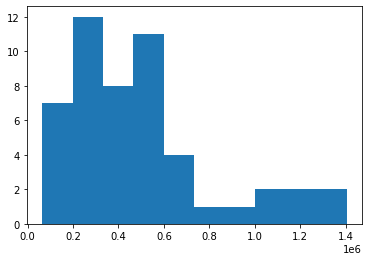

In [ ]:
fig, ax = plt.subplots()
ax.hist(df2['Annual_HH_Income'])

**THỐNG KÊ MÔ TẢ VỚI CÁC CỘT DỮ LIỆU ĐỊNH TÍNH**

Các cột dữ liệu định tính là:
- No_of_Fly_Members : Số thành viên trong gia đình
- Highest_Qualified_Member : Trình độ học vấn của các thành viên trong gia đình
- No_of_Earning_Members : Thành viên không kiếm ra tiền

In [89]:
df3 = pd.DataFrame(columns = ['No_of_Fly_Members', 'Highest_Qualified_Member', 'No_of_Earning_Members'], data = df)
df3.describe()

,No_of_Fly_Members,No_of_Earning_Members
count,50.000000,50.000000
mean,4.060000,1.460000
std,1.517382,0.734291
min,1.000000,1.000000
25%,3.000000,1.000000
50%,4.000000,1.000000
75%,5.000000,2.000000
max,7.000000,4.000000


In [90]:
a = df3['No_of_Fly_Members']
from collections import Counter
Counter(a)

Counter({1: 1, 2: 8, 3: 9, 4: 15, 5: 5, 6: 10, 7: 2})

In [91]:
b = df3['No_of_Earning_Members']
Counter(b)

Counter({1: 33, 2: 12, 3: 4, 4: 1})

'Còn đi học' : Under-Graduate,

'Mù chữ' : Illiterate,

'Tốt nghiệp' : Graduate,

'Học cao học' : Post-Graduate,

'Công việc ổn định' : Professional

In [92]:
c = df3['Highest_Qualified_Member']
Counter(c)

Counter({'Graduate': 19,
         'Illiterate': 5,
         'Post-Graduate': 6,
         'Professional': 10,
         'Under-Graduate': 10})